**Import all necessary libraries**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras import utils
from tensorflow.keras import datasets, layers, models, callbacks
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, Activation, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import SGD, Adam, Adagrad, Adadelta, RMSprop
from tensorflow.python.keras.models import Sequential, Model, load_model
from tensorflow.keras.callbacks import TensorBoard, ReduceLROnPlateau, ModelCheckpoint, EarlyStopping, CSVLogger
from tensorflow.keras.layers import Input, Add, AveragePooling2D, GlobalAveragePooling2D, GlobalMaxPooling2D
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import model_from_json
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import pydot
from matplotlib.pyplot import imshow
import scipy.misc
import os 
import glob
import gc
import numpy as np
import pandas as pd
import cv2
from joblib import Parallel, delayed
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import os
import zipfile
from google.colab import drive
import seaborn as sns
from time import time
import datetime
print("tensorflow version:",tf.__version__)

tensorflow version: 2.6.0


In [ ]:
# demonstration of calculating metrics for a neural network model using sklearn
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense
from PIL import Image

In [ ]:
drive.mount("/content/drive")

Mounted at /content/drive


**Loading Images**

**Train images**

In [ ]:
image_directory = '/content/drive/MyDrive/classification/Data/train/'
SIZE = 224
dataset = []  
label=[]

Nonfungal_images = os.listdir(image_directory + 'New non fungal/')
for i, image_name in enumerate(Nonfungal_images):    #Remember enumerate method adds a counter and returns the enumerate object
    
    if (image_name.split('.')[1] == 'jpg'):
        image = cv2.imread(image_directory + 'New non fungal/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(0)


fungal_images = os.listdir(image_directory + 'New fungal/')
for i, image_name in enumerate(fungal_images):
    if (image_name.split('.')[1] == 'jpg'):
        image = cv2.imread(image_directory + 'New fungal/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(1)

In [ ]:
dataset=np.array(dataset)
label=np.array(label)
print(dataset.shape)
print(label.shape)

(2502, 224, 224, 3)
(2502,)


**Validation images**

In [ ]:
image_directory = '/content/drive/MyDrive/classification/Data/val/'
SIZE = 224
X_val = []  
y_val=[]

Nonfungal_images = os.listdir(image_directory + 'New non fungal/')
for i, image_name in enumerate(Nonfungal_images):    #Remember enumerate method adds a counter and returns the enumerate object
    
    if (image_name.split('.')[1] == 'jpg'):
        image = cv2.imread(image_directory + 'New non fungal/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        X_val.append(np.array(image))
        y_val.append(0)


fungal_images = os.listdir(image_directory + 'New fungal/')
for i, image_name in enumerate(fungal_images):
    if (image_name.split('.')[1] == 'jpg'):
        image = cv2.imread(image_directory + 'New fungal/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        X_val.append(np.array(image))
        y_val.append(1)

In [ ]:
X_val=np.array(X_val)
y_val=np.array(y_val)
print(X_val.shape)
print(y_val.shape)

(526, 224, 224, 3)
(526,)


**Test images**

In [ ]:
image_directory = '/content/drive/MyDrive/classification/Data/test/'
SIZE = 224
X_test = []   
y_test = []  

Nonfungal_images = os.listdir(image_directory + 'New non fungal/')
for i, image_name in enumerate(Nonfungal_images):    #Remember enumerate method adds a counter and returns the enumerate object
    
    if (image_name.split('.')[1] == 'jpg'):
        image = cv2.imread(image_directory + 'New non fungal/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        X_test.append(np.array(image))
        y_test.append(0)




fungal_images = os.listdir(image_directory + 'New fungal/')
for i, image_name in enumerate(fungal_images):
    if (image_name.split('.')[1] == 'jpg'):
        image = cv2.imread(image_directory + 'New fungal/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        X_test.append(np.array(image))
        y_test.append(1)

In [ ]:
X_test=np.array(X_test)
y_test=np.array(y_test)
print(X_test.shape)
print(y_test.shape)

(676, 224, 224, 3)
(676,)


In [ ]:
# from sklearn.model_selection import train_test_split
# #from tensorflow.keras.utils import to_categorical

In [ ]:
# train_img , val_img , train_label , val_label = train_test_split(dataset , label, 
#                                                                  test_size = 0.2,
#                                                                  shuffle = True,
#                                                                  stratify = label)

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.models import Model
import tensorflow.keras as keras

resnet = ResNet50(include_top=False, weights='imagenet', input_shape=(224,224,3),pooling='max')

output = resnet.layers[-1].output
output = tf.keras.layers.Flatten()(output)
resnet = Model(resnet.input, output)

res_name = []
for layer in resnet.layers:
    res_name.append(layer.name)
resnet.summary()

94781440/94765736 [==============================] - 1s 0us/step
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_____________________________

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(resnet, to_file='/content/drive/MyDrive/Png files/Originalresnet50.png')

**Freeze 1/2 of the layers**

In [ ]:
set_trainable = False
for layer in resnet.layers:
    if layer.name in res_name[-25:]:
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Dropout

num_classes = 1

model = Sequential()
model.add(resnet)
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model (Functional)           (None, 2048)              23587712  
_________________________________________________________________
dense (Dense)                (None, 1024)              2098176   
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 1025      
Total params: 26,736,513
Trainable params: 12,084,225
Non-trainable params: 14,652,288
___________________________________

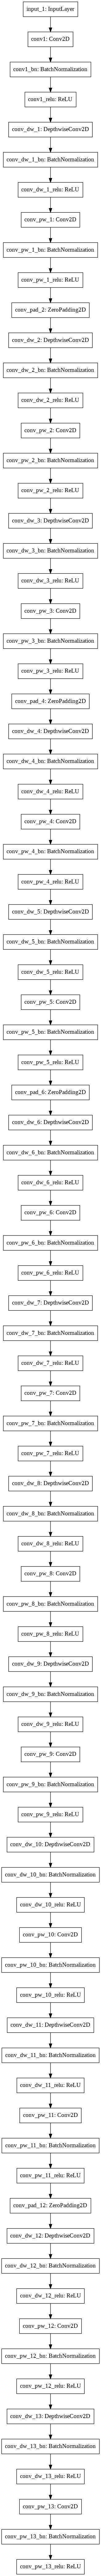

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='/content/drive/MyDrive/Png files/resnet.png')

In [ ]:
# model.save('/content/drive/MyDrive/mobile1.h5')

**Used Reduce lr**

In [ ]:
model.compile(loss='binary_crossentropy',
            optimizer = tf.optimizers.Adam(learning_rate=0.00001),
            metrics=['accuracy'])

In [ ]:
callbacks_list = [callbacks.ModelCheckpoint(
        filepath = '/content/drive/MyDrive/resnet1-finetune-model.h5',
        verbose = 1,
        monitor = 'val_loss',
        save_best_only = True),
        callbacks.ReduceLROnPlateau(
            monitor='val_loss',
            verbose = 1,
            factor=0.1,
            patience=5,
            mode='min',
            min_lr=1e-8),
        callbacks.CSVLogger(
            filename='/content/drive/MyDrive/resnet1-finetune-model.csv',
            separator = ',',
            append = False),
        callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)]

In [ ]:
# Clear any logs from previous runs
#!rm -rf /logs/fit
import time

start = time.time()
# Normal
history = model.fit(dataset,label,  
                  batch_size = 32, 
                  epochs=70,   
                  verbose=1 , 
                  callbacks = callbacks_list,
                  validation_data = (X_val,y_val)
                  )
print("Total time: ", time.time() - start, "seconds") #prints the total training time




Epoch 1/70
79/79 [==============================] - 47s 151ms/step - loss: 1.7901 - accuracy: 0.6027 - val_loss: 0.5046 - val_accuracy: 0.7700

Epoch 00001: val_loss improved from inf to 0.50456, saving model to /content/drive/MyDrive/resnet1-finetune-model.h5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/70
79/79 [==============================] - 10s 125ms/step - loss: 1.1066 - accuracy: 0.7290 - val_loss: 0.3669 - val_accuracy: 0.8612

Epoch 00002: val_loss improved from 0.50456 to 0.36686, saving model to /content/drive/MyDrive/resnet1-finetune-model.h5
Epoch 3/70
79/79 [==============================] - 10s 126ms/step - loss: 0.8235 - accuracy: 0.7862 - val_loss: 0.3048 - val_accuracy: 0.8897

Epoch 00003: val_loss improved from 0.36686 to 0.30476, saving model to /content/drive/MyDrive/resnet1-finetune-model.h5
Epoch 4/70
79/79 [==============================] - 10s 126ms/step - loss: 0.6294 - accuracy: 0.8245 - val_loss: 0.2943 - val_accuracy: 0.8973

Epoch 00004: val_loss improved from 0.30476 to 0.29432, saving model to /content/drive/MyDrive/resnet1-finetune-model.h5
Epoch 5/70
79/79 [==============================] - 10s 127ms/step - loss: 0.4440 - accuracy: 0.8657 - val_loss: 0.2802 - val_accuracy: 0.9106

Epoch 00005: val_loss improved from 0.29432 to 0.28022, savin

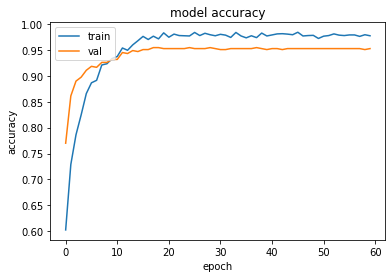

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

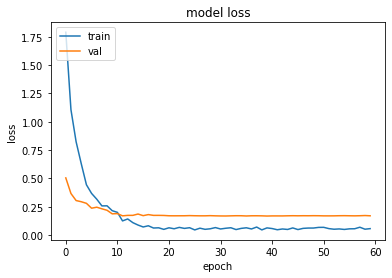

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
_, accuracy = model.evaluate(dataset,label)
print("Model accuracy on train data : " + str(accuracy*100))

_, accuracy = model.evaluate(X_val,y_val)
print("Model accuracy on Validation data : " + str(accuracy*100))

_, accuracy = model.evaluate(X_test,y_test)
print("Model accuracy on test data : " + str(accuracy*100))

79/79 [==============================] - 7s 94ms/step - loss: 0.0014 - accuracy: 1.0000
Model accuracy on train data : 100.0
17/17 [==============================] - 2s 93ms/step - loss: 0.1702 - accuracy: 0.9525
Model accuracy on Validation data : 95.24714946746826
22/22 [==============================] - 2s 110ms/step - loss: 0.1907 - accuracy: 0.9305
Model accuracy on test data : 93.04733872413635


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
import seaborn as sns

In [ ]:
y_pred = model.predict(X_test)
#y_pred = np.argmax(y_pred, axis=1)
y_pred = np.where(y_pred > 0.5, 1, 0) 
print(classification_report(y_test, y_pred))




              precision    recall  f1-score   support

           0       0.91      0.95      0.93       336
           1       0.95      0.91      0.93       340

    accuracy                           0.93       676
   macro avg       0.93      0.93      0.93       676
weighted avg       0.93      0.93      0.93       676



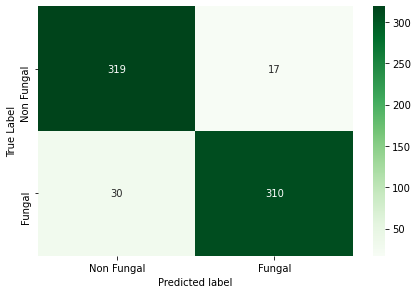

In [ ]:
test_confusion_matrix = tf.math.confusion_matrix(labels=y_test,predictions = y_pred).numpy()
figure1 = plt.figure()
LABELS = ['Non Fungal', 'Fungal']
sns.heatmap(test_confusion_matrix, xticklabels=LABELS, yticklabels=LABELS, annot = True, cmap=plt.cm.Greens, fmt='d')
plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted label')
plt.savefig('Test data Confusion Matrix', dpi=250)
plt.show()

No Skill: ROC AUC=0.500
Mobilenet: ROC AUC=0.987


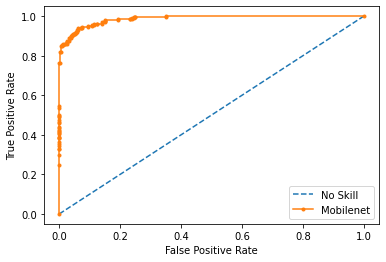

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

y_pred = model.predict(X_test)
#y_pred = np.argmax(y_pred, axis=1)

ns_probs = [0 for _ in range(len(y_test))]
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, y_pred)
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('resnet: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, y_pred)
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='resnet')

pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')


# nn_fpr_keras, nn_tpr_keras, nn_thresholds_keras = roc_curve(y_test, y_pred)
# auc_keras = auc(nn_fpr_keras, nn_tpr_keras)
# plt.plot(nn_fpr_keras, nn_tpr_keras, marker='.', label='Squeezenet (auc = %0.3f)' % auc_keras)
# plt.plot([0, 1], [0, 1], 'k--', lw=lw)
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')

# show the legend
pyplot.legend(loc="lower right")
# show the plot
pyplot.show()

**Freezing 1/3rd layers**

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.models import Model
import tensorflow.keras as keras

resnet = ResNet50(include_top=False, weights='imagenet', input_shape=(224,224,3),pooling='max')

output = resnet.layers[-1].output
output = tf.keras.layers.Flatten()(output)
resnet = Model(resnet.input, output)

res_name = []
for layer in resnet.layers:
    res_name.append(layer.name)
resnet.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [ ]:
set_trainable = False
for layer in resnet.layers:
    if layer.name in res_name[-33:]:  #first 17 layers freezed 
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Dropout

num_classes = 1

model = Sequential()
model.add(resnet)
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_1 (Functional)         (None, 2048)              23587712  
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dropout_2 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dropout_3 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 1025      
Total params: 26,736,513
Trainable params: 17,600,001
Non-trainable params: 9,136,512
__________________________________

In [ ]:
model.compile(loss='binary_crossentropy',
            optimizer = tf.optimizers.Adam(learning_rate=0.00001),
            metrics=['accuracy'])

In [ ]:
callbacks_list = [callbacks.ModelCheckpoint(
        filepath = '/content/drive/MyDrive/resnet2-finetune-model.h5',  
        verbose = 1,
        monitor = 'val_loss',
        save_best_only = True),
        callbacks.ReduceLROnPlateau(
            monitor='val_loss',
            verbose = 1,
            factor=0.1,
            patience=5,
            mode='min',
            min_lr=1e-8),
        callbacks.CSVLogger(
            filename='/content/drive/MyDrive/resnet2-finetune-model.csv',
            separator = ',',
            append = False),
        callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)]

In [ ]:
import time

start = time.time()
# Normal
history = model.fit(dataset,label,  
                  batch_size = 32, 
                  epochs=70,   
                  verbose=1 , 
                  callbacks = callbacks_list,
                  validation_data = (X_val,y_val)
                  )
print("Total time: ", time.time() - start, "seconds")  #prints the total training time

Epoch 1/70
79/79 [==============================] - 15s 145ms/step - loss: 2.3233 - accuracy: 0.6099 - val_loss: 0.3396 - val_accuracy: 0.8707

Epoch 00001: val_loss improved from inf to 0.33962, saving model to /content/drive/MyDrive/resnet2-finetune-model.h5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/70
79/79 [==============================] - 11s 137ms/step - loss: 1.2195 - accuracy: 0.7570 - val_loss: 0.2952 - val_accuracy: 0.8897

Epoch 00002: val_loss improved from 0.33962 to 0.29521, saving model to /content/drive/MyDrive/resnet2-finetune-model.h5
Epoch 3/70
79/79 [==============================] - 11s 138ms/step - loss: 0.8640 - accuracy: 0.8149 - val_loss: 0.2866 - val_accuracy: 0.9030

Epoch 00003: val_loss improved from 0.29521 to 0.28665, saving model to /content/drive/MyDrive/resnet2-finetune-model.h5
Epoch 4/70
79/79 [==============================] - 11s 138ms/step - loss: 0.6502 - accuracy: 0.8589 - val_loss: 0.2552 - val_accuracy: 0.9259

Epoch 00004: val_loss improved from 0.28665 to 0.25524, saving model to /content/drive/MyDrive/resnet2-finetune-model.h5
Epoch 5/70
79/79 [==============================] - 11s 140ms/step - loss: 0.4903 - accuracy: 0.8809 - val_loss: 0.2691 - val_accuracy: 0.9202

Epoch 00005: val_loss did not improve from 0.25524
Epoch 6/70

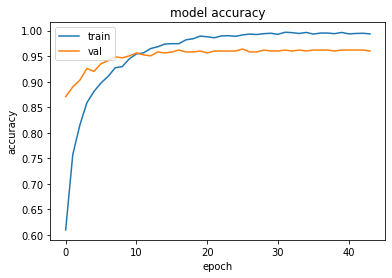

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

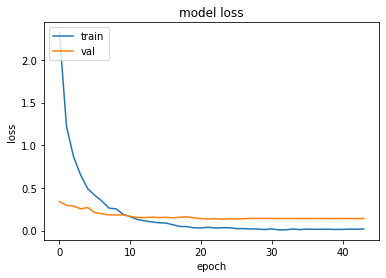

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
_, accuracy = model.evaluate(dataset,label)
print("Model accuracy on train data : " + str(accuracy*100))

_, accuracy = model.evaluate(X_val,y_val)
print("Model accuracy on Validation data : " + str(accuracy*100))

_, accuracy = model.evaluate(X_test,y_test)
print("Model accuracy on test data : " + str(accuracy*100))

79/79 [==============================] - 7s 90ms/step - loss: 6.7131e-06 - accuracy: 1.0000
Model accuracy on train data : 100.0
17/17 [==============================] - 2s 90ms/step - loss: 0.1409 - accuracy: 0.9601
Model accuracy on Validation data : 96.00760340690613
22/22 [==============================] - 2s 87ms/step - loss: 0.2051 - accuracy: 0.9482
Model accuracy on test data : 94.82248425483704


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
import seaborn as sns

In [ ]:
y_pred = model.predict(X_test)
#y_pred = np.argmax(y_pred, axis=1)
y_pred = np.where(y_pred > 0.5, 1, 0) 
print(classification_report(y_test, y_pred))




              precision    recall  f1-score   support

           0       0.94      0.96      0.95       336
           1       0.96      0.94      0.95       340

    accuracy                           0.95       676
   macro avg       0.95      0.95      0.95       676
weighted avg       0.95      0.95      0.95       676



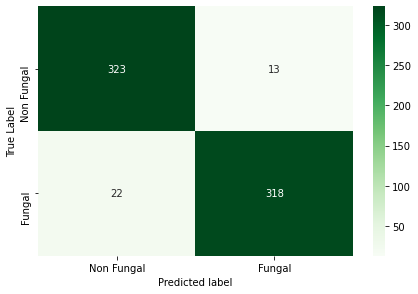

In [ ]:
test_confusion_matrix = tf.math.confusion_matrix(labels=y_test,predictions = y_pred).numpy()
figure1 = plt.figure()
LABELS = ['Non Fungal', 'Fungal']
sns.heatmap(test_confusion_matrix, xticklabels=LABELS, yticklabels=LABELS, annot = True, cmap=plt.cm.Greens, fmt='d')
plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted label')
plt.savefig('Test data Confusion Matrix', dpi=250)
plt.show()

No Skill: ROC AUC=0.500
resnet: ROC AUC=0.992


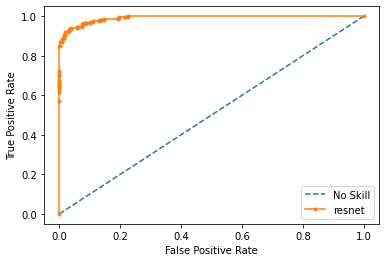

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

y_pred = model.predict(X_test)
#y_pred = np.argmax(y_pred, axis=1)

ns_probs = [0 for _ in range(len(y_test))]
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, y_pred)
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('resnet: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, y_pred)
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='resnet')

pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')


# nn_fpr_keras, nn_tpr_keras, nn_thresholds_keras = roc_curve(y_test, y_pred)
# auc_keras = auc(nn_fpr_keras, nn_tpr_keras)
# plt.plot(nn_fpr_keras, nn_tpr_keras, marker='.', label='Squeezenet (auc = %0.3f)' % auc_keras)
# plt.plot([0, 1], [0, 1], 'k--', lw=lw)
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')

# show the legend
pyplot.legend(loc="lower right")
# show the plot
pyplot.show()

**Freezing 1/4rth layers**

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.models import Model
import tensorflow.keras as keras

resnet = ResNet50(include_top=False, weights='imagenet', input_shape=(224,224,3),pooling='max')

output = resnet.layers[-1].output
output = tf.keras.layers.Flatten()(output)
resnet = Model(resnet.input, output)

res_name = []
for layer in resnet.layers:
    res_name.append(layer.name)
resnet.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [ ]:
set_trainable = False
for layer in resnet.layers:
    if layer.name in res_name[-37:]:  #first 13 layers freezed
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Dropout

num_classes = 1

model = Sequential()
model.add(resnet)
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_2 (Functional)         (None, 2048)              23587712  
_________________________________________________________________
dense_6 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dropout_4 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dropout_5 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 1025      
Total params: 26,736,513
Trainable params: 18,126,849
Non-trainable params: 8,609,664
__________________________________

In [ ]:
model.compile(loss='binary_crossentropy',
            optimizer = tf.optimizers.Adam(learning_rate=0.00001),
            metrics=['accuracy'])

In [ ]:
callbacks_list = [callbacks.ModelCheckpoint(
        filepath = '/content/drive/MyDrive/resnet3-finetune-model.h5',  
        verbose = 1,
        monitor = 'val_loss',
        save_best_only = True),
        callbacks.ReduceLROnPlateau(
            monitor='val_loss',
            verbose = 1,
            factor=0.1,
            patience=5,
            mode='min',
            min_lr=1e-8),
        callbacks.CSVLogger(
            filename='/content/drive/MyDrive/resnet3-finetune-model.csv',
            separator = ',',
            append = False),
        callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)]

In [ ]:
import time

start = time.time()
# Normal
history = model.fit(dataset,label,  
                  batch_size = 32, 
                  epochs=70,   
                  verbose=1 , 
                  callbacks = callbacks_list,
                  validation_data = (X_val,y_val)
                  )
print("Total time: ", time.time() - start, "seconds")  #prints the total training time

Epoch 1/70
79/79 [==============================] - 16s 157ms/step - loss: 2.3330 - accuracy: 0.6091 - val_loss: 0.4281 - val_accuracy: 0.8232

Epoch 00001: val_loss improved from inf to 0.42813, saving model to /content/drive/MyDrive/resnet3-finetune-model.h5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/70
79/79 [==============================] - 11s 144ms/step - loss: 1.3285 - accuracy: 0.7438 - val_loss: 0.2949 - val_accuracy: 0.8935

Epoch 00002: val_loss improved from 0.42813 to 0.29490, saving model to /content/drive/MyDrive/resnet3-finetune-model.h5
Epoch 3/70
79/79 [==============================] - 13s 160ms/step - loss: 0.8315 - accuracy: 0.8233 - val_loss: 0.2966 - val_accuracy: 0.9106

Epoch 00003: val_loss did not improve from 0.29490
Epoch 4/70
79/79 [==============================] - 12s 146ms/step - loss: 0.6192 - accuracy: 0.8553 - val_loss: 0.3029 - val_accuracy: 0.9221

Epoch 00004: val_loss did not improve from 0.29490
Epoch 5/70
79/79 [==============================] - 12s 148ms/step - loss: 0.5602 - accuracy: 0.8805 - val_loss: 0.2539 - val_accuracy: 0.9373

Epoch 00005: val_loss improved from 0.29490 to 0.25393, saving model to /content/drive/MyDrive/resnet3-finetune-model.h5
Epoch 6/70
79/79 [==============================] - 12s 148ms/step - loss: 0.424

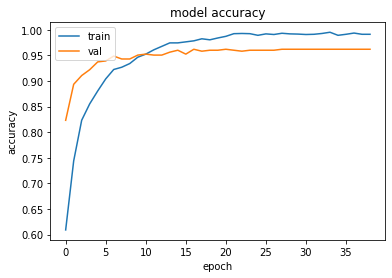

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

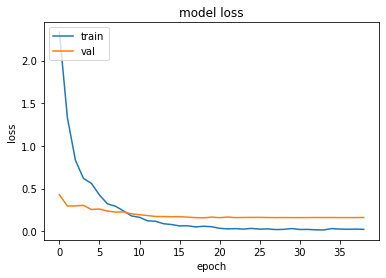

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
_, accuracy = model.evaluate(dataset,label)
print("Model accuracy on train data : " + str(accuracy*100))

_, accuracy = model.evaluate(X_val,y_val)
print("Model accuracy on Validation data : " + str(accuracy*100))

_, accuracy = model.evaluate(X_test,y_test)
print("Model accuracy on test data : " + str(accuracy*100))

79/79 [==============================] - 7s 91ms/step - loss: 3.3664e-05 - accuracy: 1.0000
Model accuracy on train data : 100.0
17/17 [==============================] - 2s 89ms/step - loss: 0.1605 - accuracy: 0.9620
Model accuracy on Validation data : 96.19771838188171
22/22 [==============================] - 2s 89ms/step - loss: 0.2185 - accuracy: 0.9527
Model accuracy on test data : 95.2662706375122


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
import seaborn as sns

In [ ]:
y_pred = model.predict(X_test)
#y_pred = np.argmax(y_pred, axis=1)
y_pred = np.where(y_pred > 0.5, 1, 0) 
print(classification_report(y_test, y_pred))




              precision    recall  f1-score   support

           0       0.93      0.98      0.95       336
           1       0.98      0.93      0.95       340

    accuracy                           0.95       676
   macro avg       0.95      0.95      0.95       676
weighted avg       0.95      0.95      0.95       676



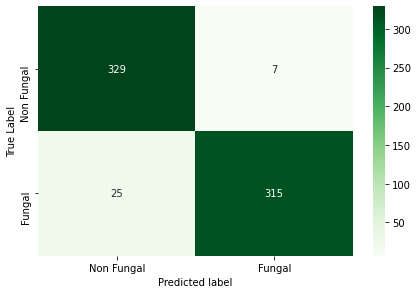

In [ ]:
test_confusion_matrix = tf.math.confusion_matrix(labels=y_test,predictions = y_pred).numpy()
figure1 = plt.figure()
LABELS = ['Non Fungal', 'Fungal']
sns.heatmap(test_confusion_matrix, xticklabels=LABELS, yticklabels=LABELS, annot = True, cmap=plt.cm.Greens, fmt='d')
plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted label')
plt.savefig('Test data Confusion Matrix', dpi=250)
plt.show()

No Skill: ROC AUC=0.500
resnet: ROC AUC=0.990


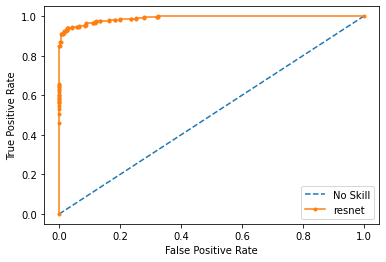

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

y_pred = model.predict(X_test)
#y_pred = np.argmax(y_pred, axis=1)

ns_probs = [0 for _ in range(len(y_test))]
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, y_pred)
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('resnet: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, y_pred)
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='resnet')

pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')


# nn_fpr_keras, nn_tpr_keras, nn_thresholds_keras = roc_curve(y_test, y_pred)
# auc_keras = auc(nn_fpr_keras, nn_tpr_keras)
# plt.plot(nn_fpr_keras, nn_tpr_keras, marker='.', label='Squeezenet (auc = %0.3f)' % auc_keras)
# plt.plot([0, 1], [0, 1], 'k--', lw=lw)
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')

# show the legend
pyplot.legend(loc="lower right")
# show the plot
pyplot.show()

**10 layers freezed**

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.models import Model
import tensorflow.keras as keras

resnet = ResNet50(include_top=False, weights='imagenet', input_shape=(224,224,3),pooling='max')

output = resnet.layers[-1].output
output = tf.keras.layers.Flatten()(output)
resnet = Model(resnet.input, output)

res_name = []
for layer in resnet.layers:
    res_name.append(layer.name)
resnet.summary()

In [ ]:
set_trainable = False
for layer in resnet.layers:
    if layer.name in res_name[-40:]:  #first 10 layers freezed
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Dropout

num_classes = 1

model = Sequential()
model.add(resnet)
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model (Functional)           (None, 2048)              23587712  
_________________________________________________________________
dense (Dense)                (None, 1024)              2098176   
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 1025      
Total params: 26,736,513
Trainable params: 18,390,529
Non-trainable params: 8,345,984
____________________________________

In [ ]:
model.compile(loss='binary_crossentropy',
            optimizer = tf.optimizers.Adam(learning_rate=0.00001),
            metrics=['accuracy'])

In [ ]:
callbacks_list = [callbacks.ModelCheckpoint(
        filepath = '/content/drive/MyDrive/resnet10-finetune-model.h5',  
        verbose = 1,
        monitor = 'val_loss',
        save_best_only = True),
        callbacks.ReduceLROnPlateau(
            monitor='val_loss',
            verbose = 1,
            factor=0.1,
            patience=5,
            mode='min',
            min_lr=1e-8),
        callbacks.CSVLogger(
            filename='/content/drive/MyDrive/resnet10-finetune-model.csv',
            separator = ',',
            append = False),
        callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)]

In [ ]:
import time

start = time.time()
# Normal
history = model.fit(dataset,label,  
                  batch_size = 32, 
                  epochs=70,   
                  verbose=1 , 
                  callbacks = callbacks_list,
                  validation_data = (X_val,y_val)
                  )
print("Total time: ", time.time() - start, "seconds")  #prints the total training time

Epoch 1/70
79/79 [==============================] - 48s 169ms/step - loss: 2.5665 - accuracy: 0.5588 - val_loss: 0.3811 - val_accuracy: 0.8422

Epoch 00001: val_loss improved from inf to 0.38110, saving model to /content/drive/MyDrive/resnet10-finetune-model.h5


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/70
79/79 [==============================] - 11s 142ms/step - loss: 1.4159 - accuracy: 0.7242 - val_loss: 0.3085 - val_accuracy: 0.8916

Epoch 00002: val_loss improved from 0.38110 to 0.30850, saving model to /content/drive/MyDrive/resnet10-finetune-model.h5
Epoch 3/70
79/79 [==============================] - 11s 143ms/step - loss: 0.9868 - accuracy: 0.7966 - val_loss: 0.2664 - val_accuracy: 0.9240

Epoch 00003: val_loss improved from 0.30850 to 0.26642, saving model to /content/drive/MyDrive/resnet10-finetune-model.h5
Epoch 4/70
79/79 [==============================] - 11s 144ms/step - loss: 0.6513 - accuracy: 0.8521 - val_loss: 0.2574 - val_accuracy: 0.9278

Epoch 00004: val_loss improved from 0.26642 to 0.25736, saving model to /content/drive/MyDrive/resnet10-finetune-model.h5
Epoch 5/70
79/79 [==============================] - 11s 145ms/step - loss: 0.5434 - accuracy: 0.8693 - val_loss: 0.2380 - val_accuracy: 0.9411

Epoch 00005: val_loss improved from 0.25736 to 0.23797, sa

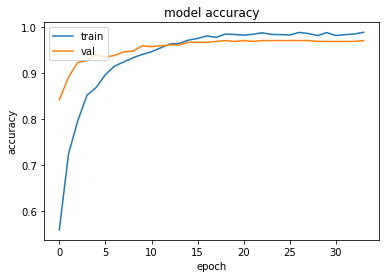

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

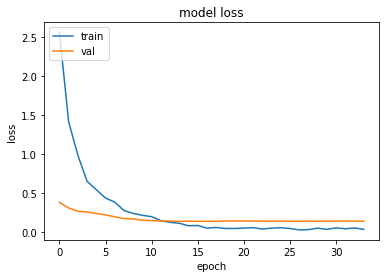

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
_, accuracy = model.evaluate(dataset,label)
print("Model accuracy on train data : " + str(accuracy*100))

_, accuracy = model.evaluate(X_val,y_val)
print("Model accuracy on Validation data : " + str(accuracy*100))

_, accuracy = model.evaluate(X_test,y_test)
print("Model accuracy on test data : " + str(accuracy*100))

79/79 [==============================] - 7s 89ms/step - loss: 1.4876e-04 - accuracy: 1.0000
Model accuracy on train data : 100.0
17/17 [==============================] - 2s 88ms/step - loss: 0.1392 - accuracy: 0.9715
Model accuracy on Validation data : 97.14828729629517
22/22 [==============================] - 2s 104ms/step - loss: 0.1735 - accuracy: 0.9512
Model accuracy on test data : 95.11834383010864


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
import seaborn as sns

In [ ]:
y_pred = model.predict(X_test)
#y_pred = np.argmax(y_pred, axis=1)
y_pred = np.where(y_pred > 0.5, 1, 0) 
print(classification_report(y_test, y_pred))




              precision    recall  f1-score   support

           0       0.92      0.98      0.95       336
           1       0.98      0.92      0.95       340

    accuracy                           0.95       676
   macro avg       0.95      0.95      0.95       676
weighted avg       0.95      0.95      0.95       676



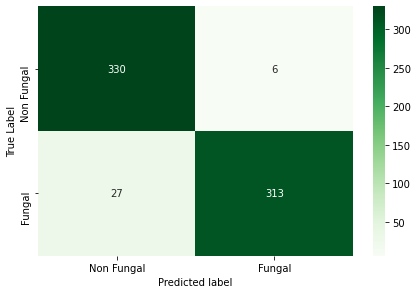

In [ ]:
test_confusion_matrix = tf.math.confusion_matrix(labels=y_test,predictions = y_pred).numpy()
figure1 = plt.figure()
LABELS = ['Non Fungal', 'Fungal']
sns.heatmap(test_confusion_matrix, xticklabels=LABELS, yticklabels=LABELS, annot = True, cmap=plt.cm.Greens, fmt='d')
plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted label')
plt.savefig('Test data Confusion Matrix', dpi=250)
plt.show()

No Skill: ROC AUC=0.500
resnet: ROC AUC=0.991


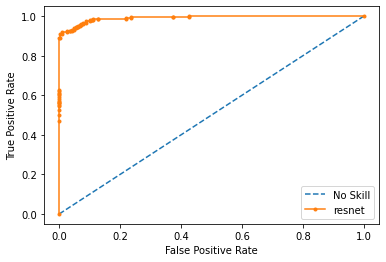

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

y_pred = model.predict(X_test)
#y_pred = np.argmax(y_pred, axis=1)

ns_probs = [0 for _ in range(len(y_test))]
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, y_pred)
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('resnet: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, y_pred)
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='resnet')

pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')


# nn_fpr_keras, nn_tpr_keras, nn_thresholds_keras = roc_curve(y_test, y_pred)
# auc_keras = auc(nn_fpr_keras, nn_tpr_keras)
# plt.plot(nn_fpr_keras, nn_tpr_keras, marker='.', label='Squeezenet (auc = %0.3f)' % auc_keras)
# plt.plot([0, 1], [0, 1], 'k--', lw=lw)
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')

# show the legend
pyplot.legend(loc="lower right")
# show the plot
pyplot.show()